## California Housing Price Prediction Project

### Part A: Predict housing prices using all feature variables

#### 1. Import Necessary libraries to use

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split

#### 2. Read housing data from Excel file and inspect the data and datatypes

In [2]:
df_California_housing_data = pd.read_excel("California_housing_data.xlsx")
df_California_housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
df_California_housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

#### 3. From above we got to know that only ocean_proximity is non-numeric column, lets replace it with numeric values in step 6.

#### 4. Standardize the target and fill missing values with mean of respective columns.

In [4]:
df_California_housing_data["median_house_value"] = np.log(df_California_housing_data["median_house_value"])

In [5]:
#Check for ROWS with MISSING VALUES
df_California_housing_data[df_California_housing_data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,11.994734
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,11.351582
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,12.063356
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,12.417548
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,12.091783
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN,12.303653
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN,12.028141
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,12.925618
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN,12.461102


In [6]:
#From above observation total_bedrooms column has missing values so replace it with mean of total_bedrooms.
df_California_housing_data["total_bedrooms"] = df_California_housing_data["total_bedrooms"].replace(np.nan,df_California_housing_data["total_bedrooms"].mean())

In [7]:
#Checking again if any missing values exists for other columns other than total_bedrooms
df_California_housing_data[df_California_housing_data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


#### 5. Check the total categories available for non-numeric categorical column, "ocean_proximity".

In [8]:
df_California_housing_data.groupby('ocean_proximity').describe()

longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...      5.180500   
INLAND          -117.8400 -114.31   6551.0  36.731829  ...      3.961500   
ISLAND          -118.3200 -118.32      5.0  33.358000  ...      2.833300   
NEAR BAY        -122.1400 -122.01   2290.0  37.801057  ...      5.054425   
NEAR OCEAN      -117.1825 -116.97   2658.0  34.738439  ...      4.837400   

                         median_house_value                                  \
                     max              count       mean       std        min   
ocean_proximity                                                               
<1H OCEAN        15.0001             9136.0  12.296695  0.429593   9.769956   
INLAND           15.0001             6551.0  11.610977  0.482824   9.615739   
ISLAND            3.3906                5.0  12.829966  0.221861  12.568978   
NEAR BAY         15.0001             2290.0  12.345131  0.507030  10.021271   
NEAR OCEAN       15.0001             2658.0  12.299245  0.521518  10.021271   

                                                             
                       25%        50%        75%        max  
ocean_proximity                                              
<1H OCEAN        12.008231  12.277695  12.574528  13.122365  
INLAND           11.258033  11.594505  11.911366  13.122365  
ISLAND           12.611538  12.935311  13.017003  13.017003  
NEAR BAY         11.998433  12.362221  12.753327  13.122365  
NEAR OCEAN       11.918391  12.343440  12.684633  13.122365  

[5 rows x 72 columns]

#### 6. There is one categorical column called ocean_proximity with 5 categories. Replace categorical column with integer values and view the modified dataframe.

In [9]:
cleanup_cats  = {"ocean_proximity":     {"<1H OCEAN": 1, "INLAND": 2, "ISLAND": 3,"NEAR BAY":4, "NEAR OCEAN":5 }}
df_California_housing_data.replace(cleanup_cats, inplace=True)
df_California_housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,4,13.022764
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,4,12.789684
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,4,12.771671
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,4,12.740517
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,4,12.743151


#### 7. Split features and target variables in to X_features and Y_target

In [10]:
X_features = df_California_housing_data.iloc[:,:-1]
Y_target = df_California_housing_data.iloc[:,-1:]

#### 8. View Features dataset and shape of the dataframe

In [11]:
X_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,4
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,4
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,4
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,4


In [12]:
X_features.shape

(20640, 9)

#### 9. View Target dataset

In [13]:
Y_target.head()

,median_house_value
0,13.022764
1,12.789684
2,12.771671
3,12.740517
4,12.743151


In [14]:
Y_target.shape

(20640, 1)

#### 10. Split the original dataset in to training and test datasets with 80% training and 20% test dataset

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_target,test_size=0.2, random_state = 1)

#### 11. view the shape of splitted train and test datasets

In [16]:
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((16512, 9), (4128, 9), (16512, 1), (4128, 1))

#### 12: Create a model  to predict the housing prices outcome

In [17]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#Print the intercept and coefficients 
linreg.coef_, linreg.intercept_

(array([[-2.83742511e-01, -2.85020462e-01,  3.30446057e-03,
         -2.55046046e-05,  3.82669160e-04, -1.75730920e-04,
          3.29035909e-04,  1.76792041e-01, -1.14211075e-02]]),
 array([-12.49089022]))

##### 13. Predict the House Price from our trained model

In [19]:
#Predict the outcome for the testing dataset
Y_pred = linreg.predict(X_test)
Y_pred

array([[12.27225661],
       [11.52356751],
       [12.28176997],
       ...,
       [12.4349876 ],
       [12.30948071],
       [11.77940924]])

#### 14: Calculate the Mean Square Error (MSE)

In [20]:
#Import required libraries for calculating root MSE (mean square error)
from sklearn import metrics


In [21]:
#root mean squared error calculation:
rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
rmse

0.34835878102223805

In [22]:
#taking exponent to get correct values as we normalized the prices using log
print(np.exp(Y_test.values[0]),np.exp(Y_pred[0]))
print(np.exp(Y_test.values[10]),np.exp(Y_pred[10]))
print(np.exp(Y_test.values[4101]),np.exp(Y_pred[4101]))

[355000.] [213684.64980857]
[293800.] [201067.31760443]
[324700.] [335781.23144686]


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
X_test['median_income']

4712     3.2500
2151     1.9784
15927    4.0132
82       1.5208
8161     5.1795
          ...  
2319     2.3173
5341     2.1875
16888    5.0480
6823     4.8750
11878    2.7054
Name: median_income, Length: 4128, dtype: float64

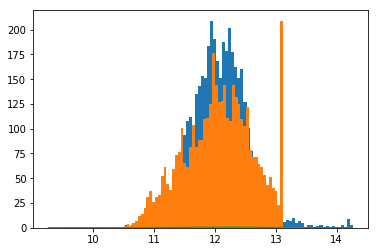

In [25]:
plt.hist(np.array(Y_pred), bins=75,label = "expected")
plt.hist(np.array(Y_test['median_house_value']), bins=75,label = "predicted")
sns.distplot(np.array(Y_test['median_house_value']))

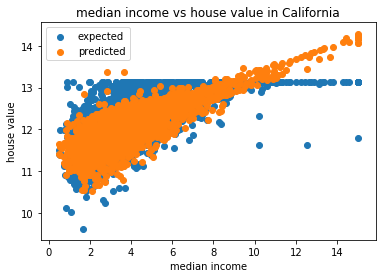

In [26]:
plt.scatter(np.array(X_test['median_income']),np.array(Y_test['median_house_value']),label = "expected")
plt.scatter(np.array(X_test['median_income']),np.array(Y_pred), label = "predicted")
plt.title('median income vs house value in California')
plt.xlabel('median income')
plt.ylabel('house value')
plt.legend()
plt.show()


### Part B: Predict housing prices using median income feature

In [27]:
# lets use median_income as feature column and nuild our model. We already cleaned the data and amputed missing values with mean in section A and converted categorical column to numeric.
X_features_B = df_California_housing_data["median_income"]
Y_target_B = df_California_housing_data.iloc[:,-1:]

In [28]:
#take a look at our data
X_features_B, Y_target_B

(0        8.3252
 1        8.3014
 2        7.2574
 3        5.6431
 4        3.8462
           ...  
 20635    1.5603
 20636    2.5568
 20637    1.7000
 20638    1.8672
 20639    2.3886
 Name: median_income, Length: 20640, dtype: float64,
        median_house_value
 0               13.022764
 1               12.789684
 2               12.771671
 3               12.740517
 4               12.743151
 ...                   ...
 20635           11.265745
 20636           11.252859
 20637           11.432799
 20638           11.346871
 20639           11.400876
 
 [20640 rows x 1 columns])

In [29]:
#Split the training and test data and look at their shape
X_train_B, X_test_B, Y_train_B, Y_test_B = train_test_split(X_features_B, Y_target_B,test_size=0.2, random_state = 1)
X_train_B.shape,X_test_B.shape, Y_train_B.shape, Y_test_B.shape

((16512,), (4128,), (16512, 1), (4128, 1))

In [30]:
#create linear regression model using scikit learn
linreg_B = LinearRegression()
linreg_B.fit(X_train_B.values.reshape(-1,1), Y_train_B)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#Print the intercept and coefficients 
linreg_B.coef_, linreg_B.intercept_

(array([[0.19809328]]), array([11.32193123]))

In [32]:
#Predict the outcome for the testing dataset
Y_pred_B = linreg_B.predict(X_test_B.values.reshape(-1,1))
np.exp(Y_pred_B)

array([[157272.3666001 ],
       [122251.90391769],
       [182941.04003019],
       ...,
       [224561.7769342 ],
       [216996.38772007],
       [141188.73186901]])

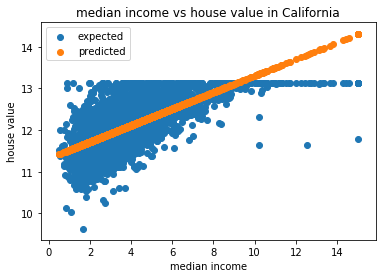

In [33]:
#lets plot a graph of predicted and expected values
plt.scatter(X_test_B,Y_test_B,label = "expected")
plt.scatter(X_test_B,Y_pred_B, label = "predicted")
plt.title('median income vs house value in California')
plt.xlabel('median income')
plt.ylabel('house value')
plt.legend()
plt.show()
